# Instagram Analysis

# Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# An overview over the data

In [2]:
df = pd.read_csv('social media influencers - instagram.csv')

In [ ]:
df.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [ ]:
df.shape

(1000, 8)

# Preprocessing

In [3]:
df.rename(columns={'category_1': 'Category'}, inplace=True)
df.rename(columns={'Audience country(mostly)': 'Top audience country'}, inplace=True)
df.rename(columns={'Authentic engagement\r\n': 'Authentic engagement'}, inplace=True)
df.rename(columns={'Engagement avg\r\n': 'Engagement average'}, inplace=True)

In [ ]:
df.isnull().sum()

Influencer insta name      0
instagram name            21
Category                 108
category_2               713
Followers                  0
Top audience country      14
Authentic engagement       0
Engagement average         0
dtype: int64

- We will drop instagram name as this might not be unique and has another alternative column
- We will drop category 2 as it contains a huge percentage of nulls

In [4]:
df.drop('instagram name', axis = 1,inplace=True)
df.drop('category_2', axis = 1,inplace=True)

In [ ]:
df.head()

,Influencer insta name,Category,Followers,Top audience country,Authentic engagement,Engagement average
0,433,Sports with a ball,48.5M,Spain,383.1K,637K
1,__youngbae__,Music,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,Shows,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Lifestyle,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,NaN,11.1M,Indonesia,2.5M,3.1M


- We will impute nulls using mode values

In [5]:
df['Top audience country'].fillna(df['Top audience country'].mode()[0], inplace = True)
df['Category'].fillna(df['Category'].mode()[0], inplace = True)

In [ ]:
df.isnull().sum()

Influencer insta name    0
Category                 0
Followers                0
Top audience country     0
Authentic engagement     0
Engagement average       0
dtype: int64

- We will convert 'M' and 'K' to their corresponding numerical values

In [6]:
df["Followers"]=df["Followers"].replace({"K":"1e3", "M":"1e6"}, regex=True).map(pd.eval).astype(int)
df["Engagement average"]=df["Engagement average"].replace({"K":"1e3", "M":"1e6"}, regex=True).map(pd.eval).astype(int)
df["Authentic engagement"]=df["Authentic engagement"].replace({"K":"1e3", "M":"1e6"}, regex=True).map(pd.eval).astype(int)

- Now the data is ready for analysis

In [ ]:
df.head()

,Influencer insta name,Category,Followers,Top audience country,Authentic engagement,Engagement average
0,433,Sports with a ball,48510000,Spain,383110,6371000
1,__youngbae__,Music,12710000,Indonesia,4781000,542310
2,_agentgirl_,Shows,18810000,Russia,310810,377910
3,_imyour_joy,Lifestyle,13510000,Indonesia,1110000,1410000
4,_jeongjaehyun,Music,11110000,Indonesia,2510000,3110000


# Analysis

# Category

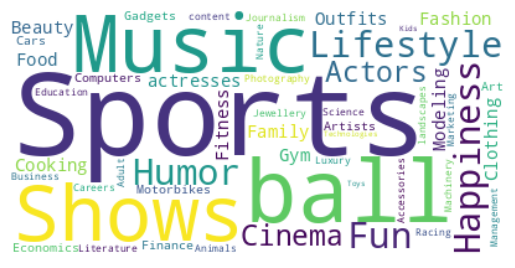

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# # Get the list of categories
categories = list(df['Category'].unique())

# # Create a string with all the categories separated by spaces
categories_text = ' '.join(categories)

# # Generate the wordcloud
wordcloud = WordCloud(background_color='white').generate(categories_text)

# # Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Top categories followers
- We can clearly see that people are mostly interested in music accounts or accounts related to sports with a ball (football,basketball...etc)

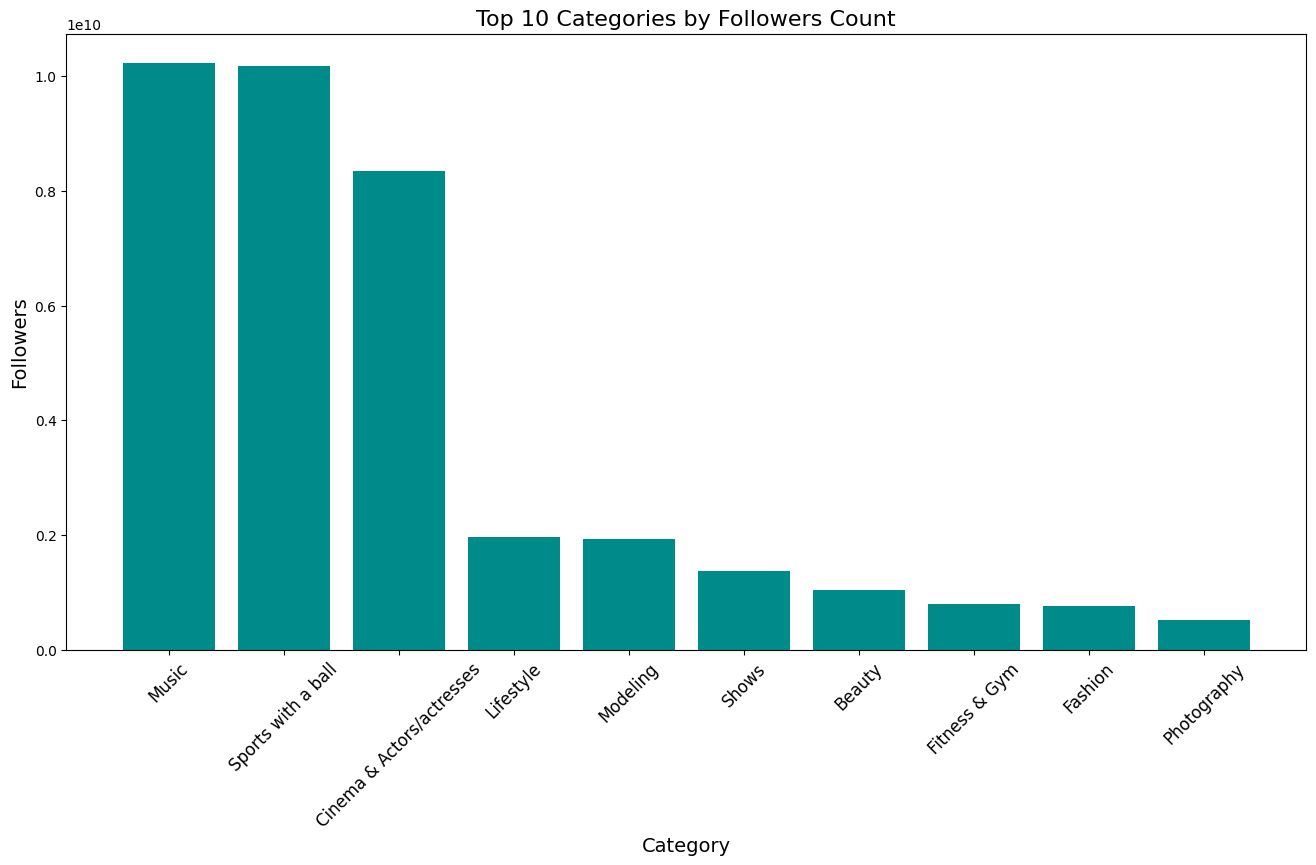

In [ ]:
# Group the data
category_followers = df.groupby('Category')['Followers'].sum()

# Top 10
top_10 = category_followers.nlargest(10)

plt.figure(figsize=(16, 8))
plt.bar(top_10.index, top_10.values, color='darkcyan')
plt.title('Top 10 Categories by Followers Count', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Followers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

# Influencers with top followers count
- We can recognise the link between this visualization and the previous one; the bar chart shows that most of the top influencers are related to sports(neymarjr,psg,mosalah...etc)

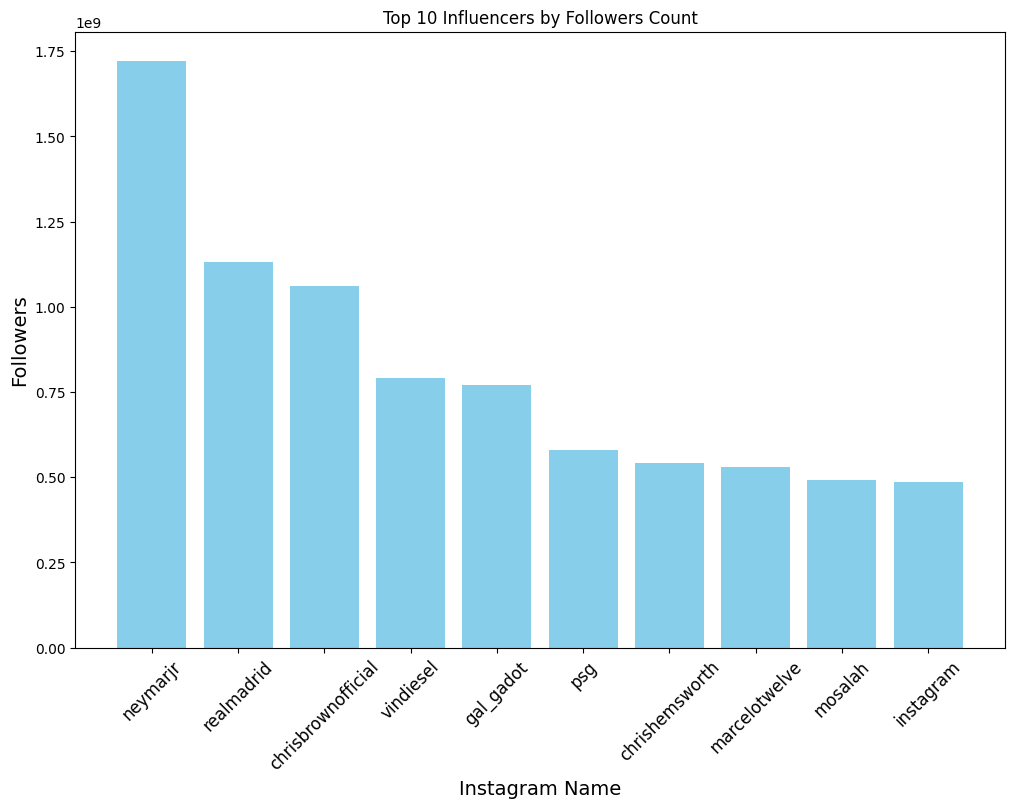

In [ ]:
# Get the top 10 influencers
top_10 = df.nlargest(10, 'Followers')

# Create a bar chart of the top 10 influencers by followers
plt.figure(figsize=(12, 8))
plt.bar(top_10['Influencer insta name'], top_10['Followers'], color='skyblue')
plt.title('Top 10 Influencers by Followers Count')
plt.xlabel('Instagram Name', fontsize=14)
plt.ylabel('Followers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()


# Top audience countries 
- We can here see the countries who contribute to the number of followers of influencers with United States taking the lead

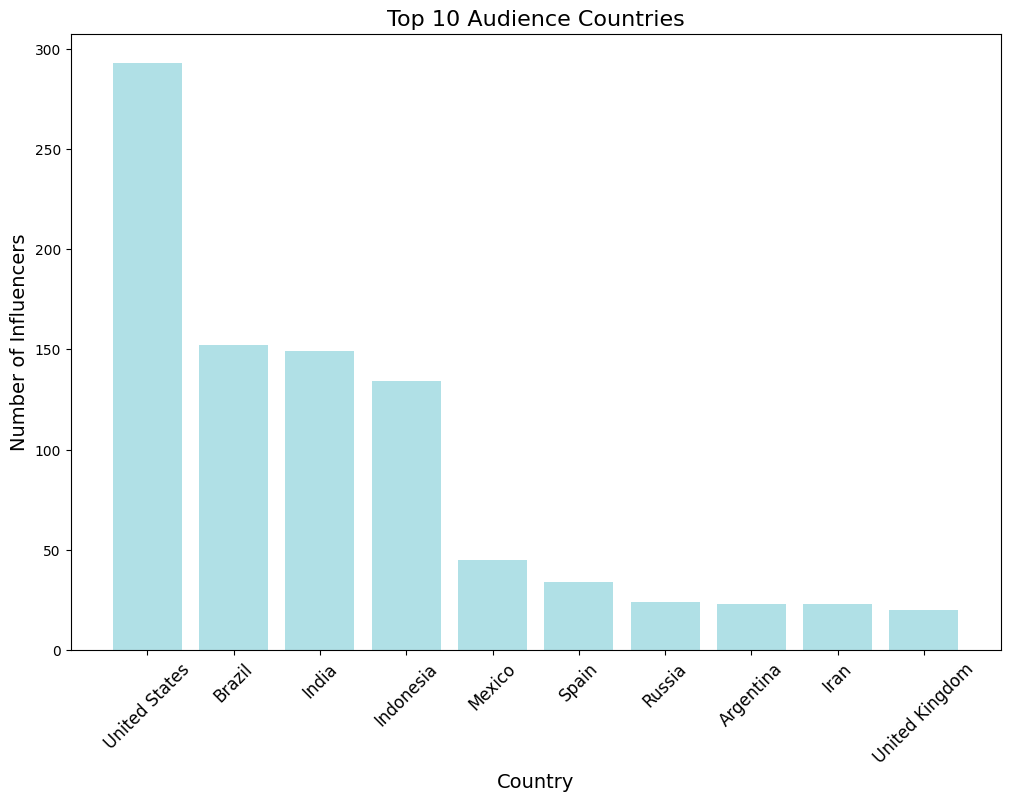

In [ ]:
# Get the top 10 audience countries
top_10 = df['Top audience country'].value_counts().nlargest(10)

# Create a bar chart of the top 10 audience countries
plt.figure(figsize=(12, 8))
plt.bar(top_10.index, top_10.values, color='powderblue')
plt.title('Top 10 Audience Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Influencers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()


# Top 10 influencers and their engagement metrics
- Here we visualize the rate of commitment between the audience and top influencers
- We can see that psg takes the lead with the highest engagement average (highest commitment)
- We can also see that neymarjr has the highest authentic engagement which means that the account has the highest number of likes and comments

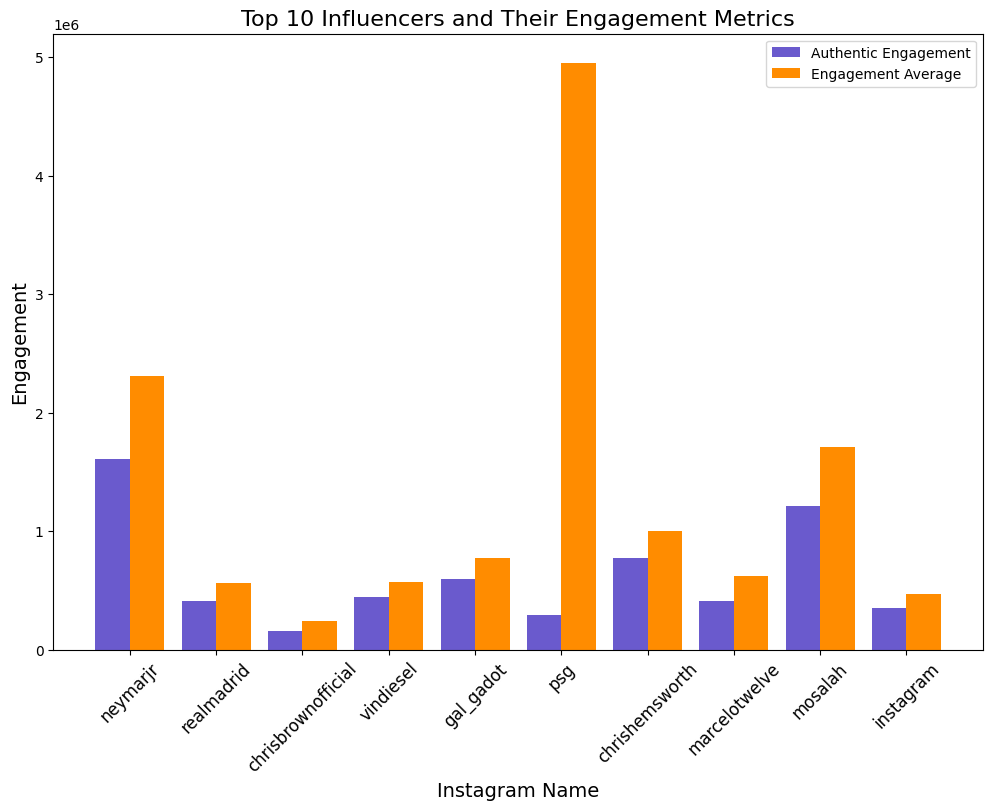

In [ ]:
# Get the top 10 influencers
top_10 = df.nlargest(10, 'Followers')

fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of each bar
bar_width = 0.4

ax.bar(top_10['Influencer insta name'], top_10['Authentic engagement'], width=bar_width, label='Authentic Engagement', color='slateblue')

# Shift the x positions to the right to create space for the next bar
x_positions = [x + bar_width for x in range(len(top_10))]
    
ax.bar(x_positions, top_10['Engagement average'], width=bar_width, label='Engagement Average', color='darkorange')

# Set the chart title and axis labels
ax.set_title('Top 10 Influencers and Their Engagement Metrics', fontsize=16)
ax.set_xlabel('Instagram Name', fontsize=14)
ax.set_ylabel('Engagement', fontsize=14)

plt.xticks([x + bar_width/2 for x in range(len(top_10))], top_10['Influencer insta name'], rotation=45, fontsize=12)
ax.legend()
plt.show()


# Top 10 categories with engagement metrics
- Here we visualize which categories attract the most commitment and contribution from followers
- We can see that music takes the lead which again proves the previous visualizations

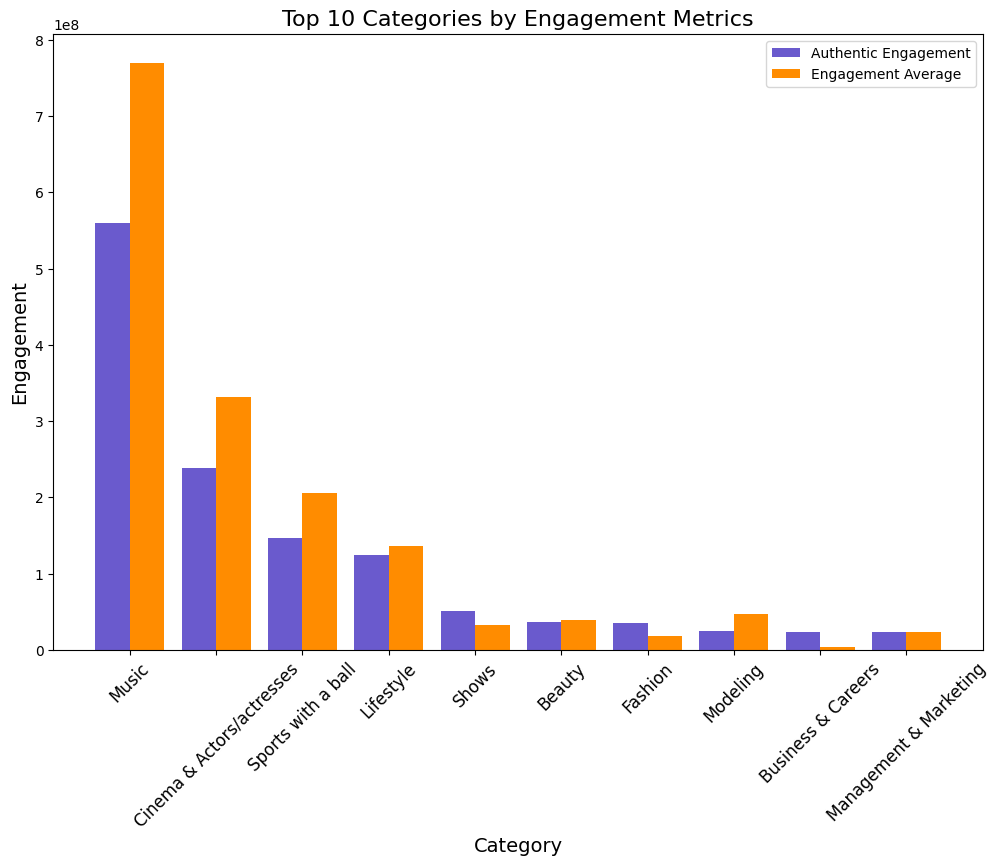

In [ ]:
# Get the top 10 categories by Authentic engagement
top_10 = df.groupby('Category')[['Authentic engagement', 'Engagement average']].sum().nlargest(10, 'Authentic engagement')

fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of each bar
bar_width = 0.4

# Create the bar chart for Authentic engagement
ax.bar([x - bar_width/2 for x in range(len(top_10))], top_10['Authentic engagement'], width=bar_width, label='Authentic Engagement', color='slateblue')

# Create the bar chart for Engagement average
ax.bar([x + bar_width/2 for x in range(len(top_10))], top_10['Engagement average'], width=bar_width, label='Engagement Average', color='darkorange')

# Set the chart title and axis labels
ax.set_title('Top 10 Categories by Engagement Metrics', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Engagement', fontsize=14)

# Customize the tick labels and rotation
plt.xticks([x for x in range(len(top_10))], top_10.index, rotation=45, fontsize=12)

# Add a legend
ax.legend()

# Show the chart
plt.show()


# Top 10 audience countries with engagement metrics
- Here we visualize which countries are committed to instagram and show the highest contributions
- We can see that United States takes the lead which also proves some of the previous visualizations

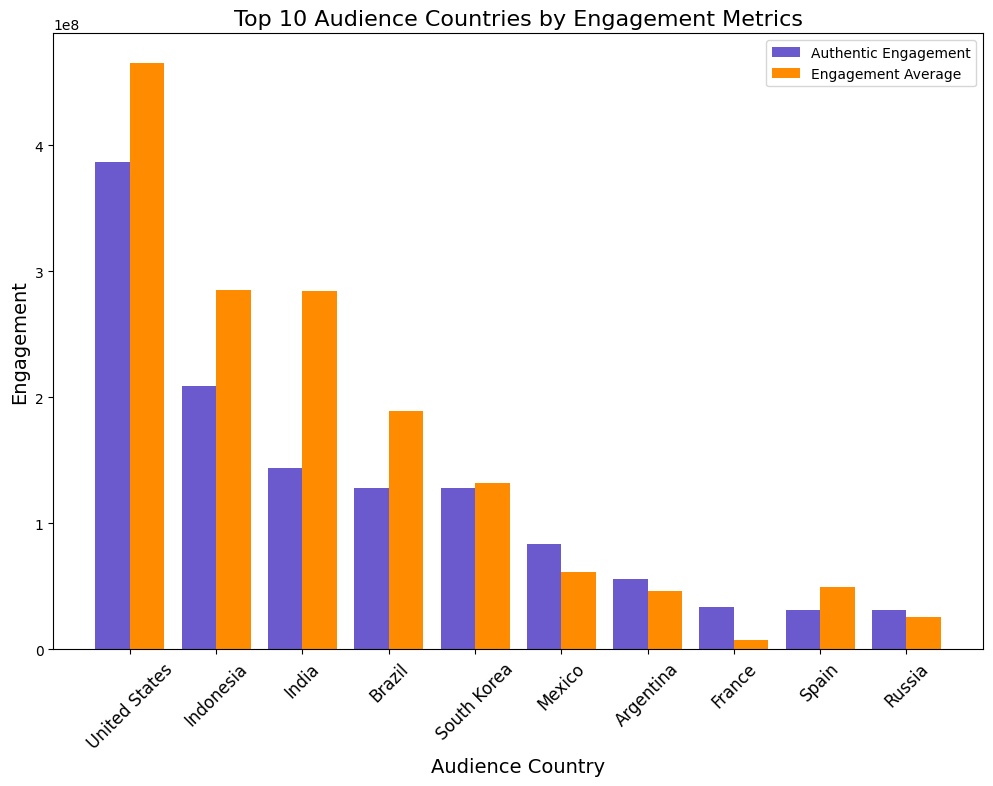

In [ ]:
# Get the top 10 categories by Authentic engagement
top_10 = df.groupby('Top audience country')[['Authentic engagement', 'Engagement average']].sum().nlargest(10, 'Authentic engagement')

fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of each bar
bar_width = 0.4

# Create the bar chart for Authentic engagement
ax.bar([x - bar_width/2 for x in range(len(top_10))], top_10['Authentic engagement'], width=bar_width, label='Authentic Engagement', color='slateblue')
# Create the bar chart for Engagement average
ax.bar([x + bar_width/2 for x in range(len(top_10))], top_10['Engagement average'], width=bar_width, label='Engagement Average', color='darkorange')
# Set the chart title and axis labels
ax.set_title('Top 10 Audience Countries by Engagement Metrics', fontsize=16)
ax.set_xlabel('Audience Country', fontsize=14)
ax.set_ylabel('Engagement', fontsize=14)

# Customize the tick labels and rotation
plt.xticks([x for x in range(len(top_10))], top_10.index, rotation=45, fontsize=12)

ax.legend()
plt.show()

# Relation between audience country and category
- Here we can see which category is each country interested in the most
- We can see some categories showing interest in almost all of the countries such as sports with a ball, music, lifestyle, clothing and outfits.

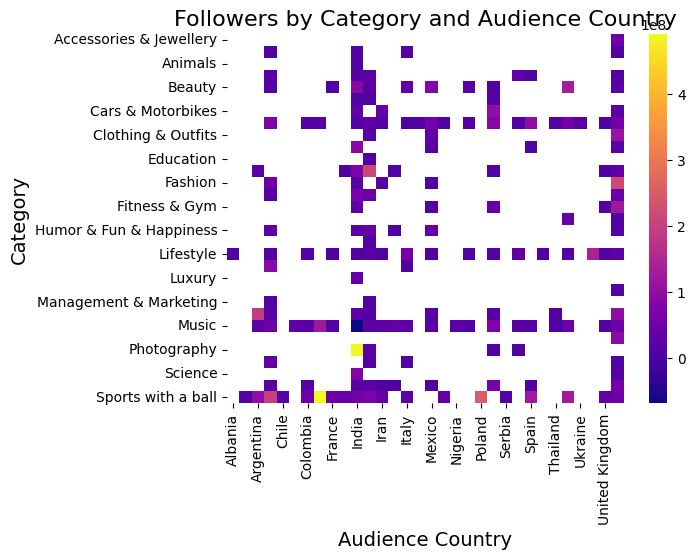

In [ ]:
# create a pivot table of Followers by Category and Audience country
heatmap_data = pd.pivot_table(df, values='Followers', index='Category', columns='Top audience country')

# create the heatmap using seaborn
sns.heatmap(heatmap_data, cmap='plasma')

# set the title and axis labels
plt.title('Followers by Category and Audience Country', fontsize=16)
plt.xlabel('Audience Country', fontsize=14)
plt.ylabel('Category', fontsize=14)

# show the plot
plt.show()


# top 10 categories by Engagement average

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Top 10 Categories by Engagement Average')

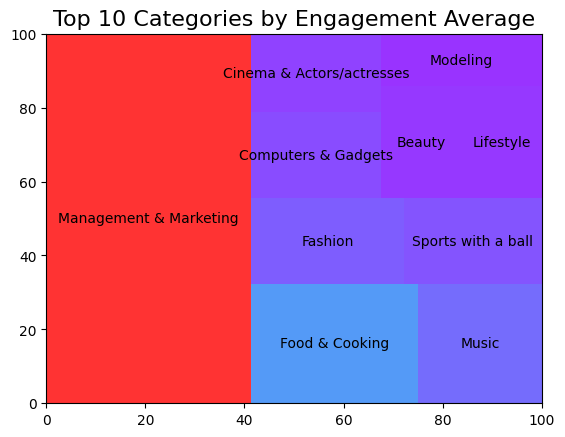

In [9]:
!pip install squarify
import squarify

# # Get the top 10 categories by Engagement average
top_10 = df.groupby('Category')['Engagement average'].mean().nlargest(10)

# # Create a color map
cmap = plt.cm.rainbow

# # Assign a color to each category
mini, maxi = top_10.min(), top_10.max()
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in top_10.values]

# # Create the treemap
squarify.plot(sizes=top_10.values, label=top_10.index, alpha=.8, color=colors)

# # Set the chart title
plt.title('Top 10 Categories by Engagement Average', fontsize=16)

# # Remove the axis ticks and labels
# plt.axis('off')

# # Show the chart
# plt.show()
